In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import ccf

In [40]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [41]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [42]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [43]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [44]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [45]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [46]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [47]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

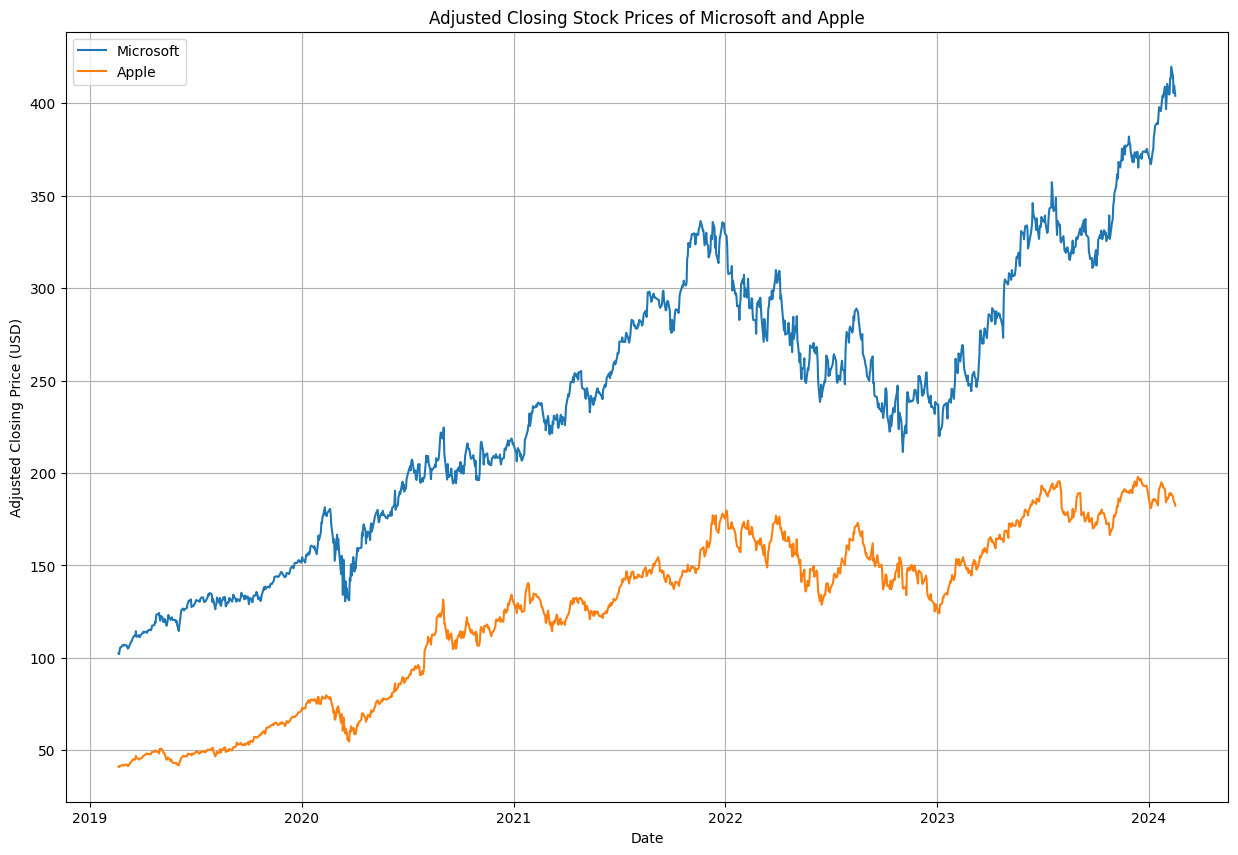

In [48]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

## YOUR CODE STARTS HERE

plt.figure(figsize=(15, 10))
plt.plot(microsoft_df.index, microsoft_df['Adj Close'], label ='Microsoft')
plt.plot(apple_df.index, apple_df['Adj Close'], label='Apple')
plt.title('Adjusted Closing Stock Prices of Microsoft and Apple')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Enter answer here:**

Both prices show an overall increasing trend over time, indicating growth for both companies. Microsoft's prices demonstrates a steeper increase, compared to Apple's, suggeting a better growth rate with the given time period.

## (b)

In [49]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

#downsample Microsoft stock data
microsoft_weekly = microsoft_df.resample('W').mean()
microsoft_monthly = microsoft_df.resample('M').mean()
microsoft_quarterly = microsoft_df.resample('Q').mean()
microsoft_semi_annual = microsoft_df.resample('6M').mean()
microsoft_annual = microsoft_df.resample('A').mean()


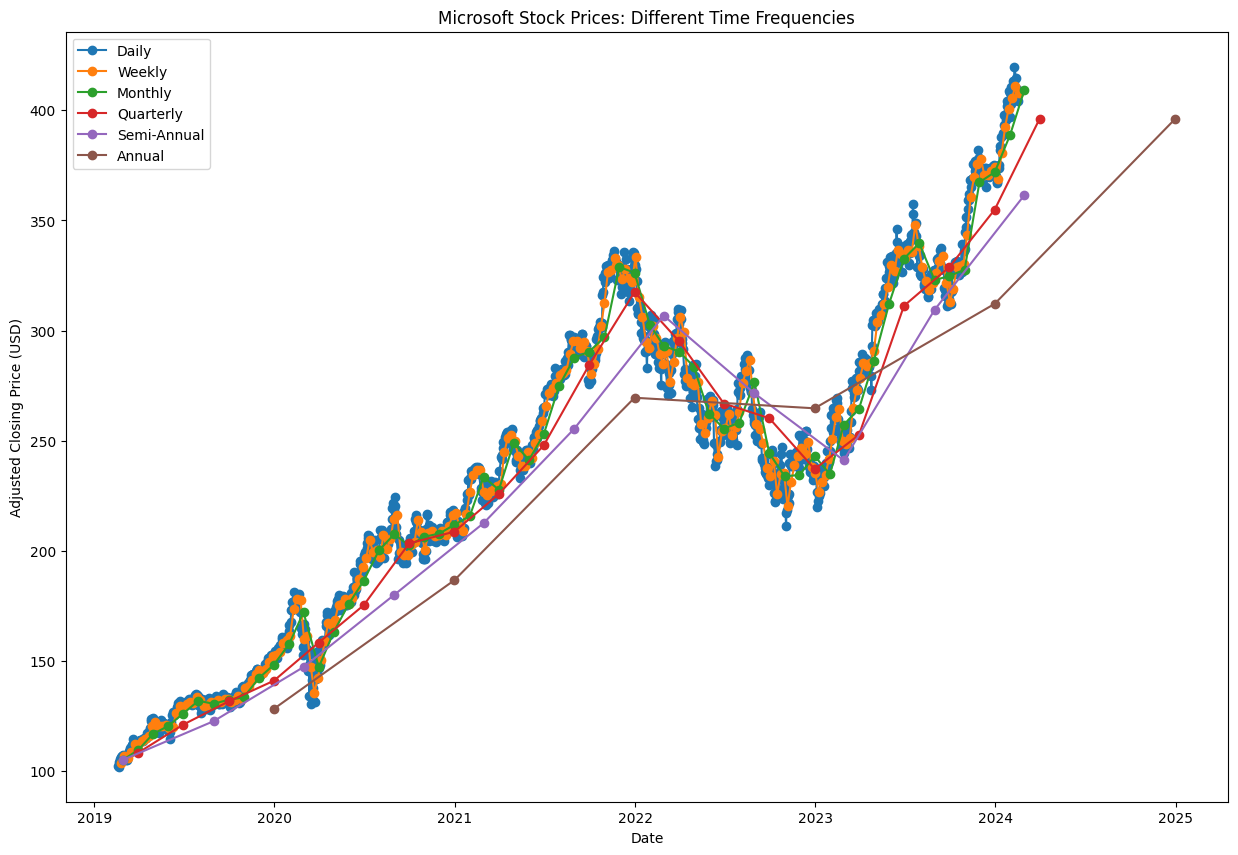

In [50]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE

#plot the initial and the downsampled data
plt.figure(figsize=(15, 10))
plt.plot(microsoft_df.index, microsoft_df['Adj Close'], label='Daily', marker='o')
plt.plot(microsoft_weekly.index, microsoft_weekly['Adj Close'], label='Weekly', marker='o')
plt.plot(microsoft_monthly.index, microsoft_monthly['Adj Close'], label='Monthly', marker='o')
plt.plot(microsoft_quarterly.index, microsoft_quarterly['Adj Close'], label='Quarterly', marker='o')
plt.plot(microsoft_semi_annual.index, microsoft_semi_annual['Adj Close'], label='Semi-Annual', marker='o')
plt.plot(microsoft_annual.index, microsoft_annual['Adj Close'], label='Annual', marker='o')
plt.title('Microsoft Stock Prices: Different Time Frequencies')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.show()

In [51]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

#downsample Apple stock data
apple_weekly = apple_df.resample('W').mean()
apple_monthly = apple_df.resample('M').mean()
apple_quarterly = apple_df.resample('Q').mean()
apple_semi_annual = apple_df.resample('6M').mean()
apple_annual = apple_df.resample('A').mean()

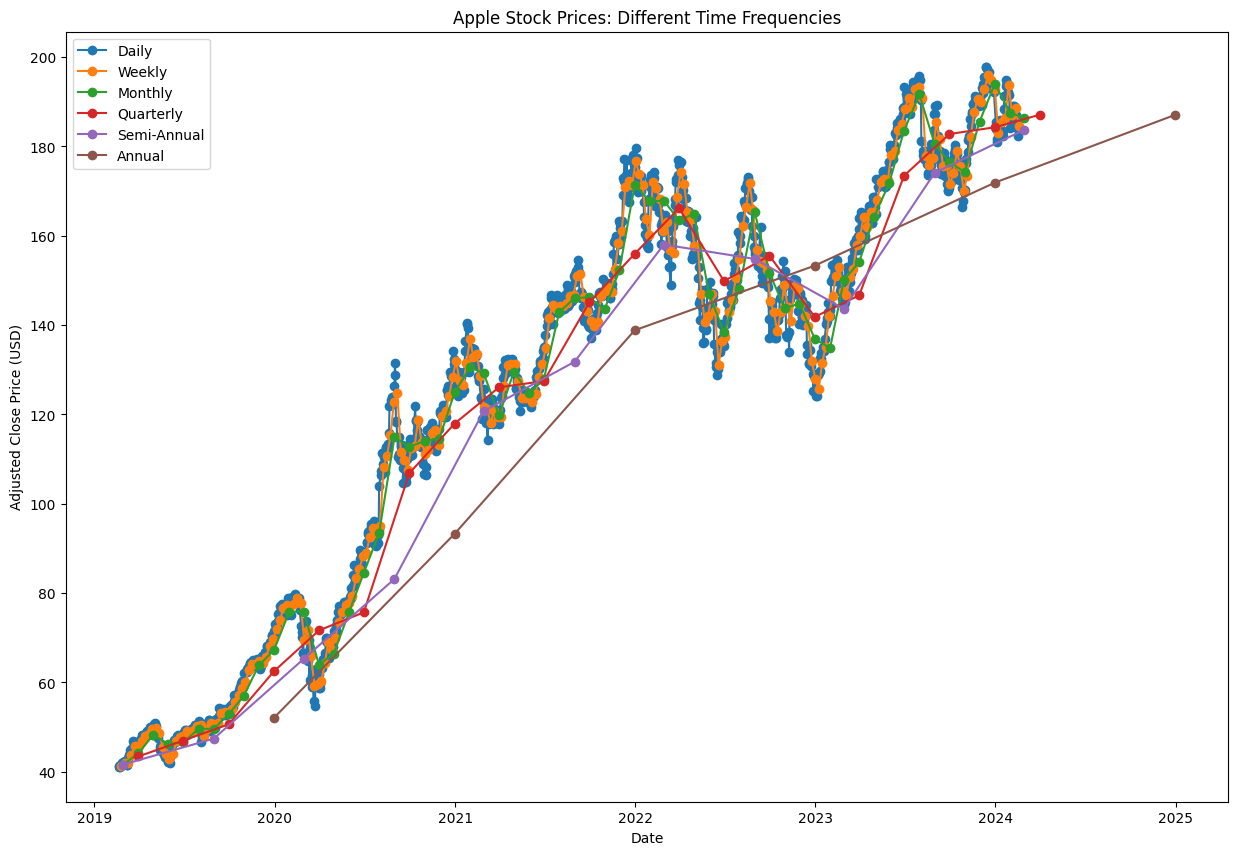

In [52]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE

#plot the initial and downsampled data
plt.figure(figsize=(15, 10))
plt.plot(apple_df.index, apple_df['Adj Close'], label='Daily', marker='o')
plt.plot(apple_weekly.index, apple_weekly['Adj Close'], label='Weekly', marker='o')
plt.plot(apple_monthly.index, apple_monthly['Adj Close'], label='Monthly', marker='o')
plt.plot(apple_quarterly.index, apple_quarterly['Adj Close'], label='Quarterly', marker='o')
plt.plot(apple_semi_annual.index, apple_semi_annual['Adj Close'], label='Semi-Annual', marker='o')
plt.plot(apple_annual.index, apple_annual['Adj Close'], label='Annual', marker='o')
plt.title('Apple Stock Prices: Different Time Frequencies')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

## (c)


**Enter answer here:**

Pro: downsampling can help to reduce noise and uncover long-term trends by smoothing out short-term fluctuations.

Con: may lead to the loss of important data that takes place at higher frequencies.

# Q2

## (a)

In [53]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE

#adding monthly return to Microsoft df
microsoft_monthly['monthly_return'] = microsoft_monthly['Adj Close'].pct_change()
microsoft_monthly.head()


,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [54]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE

apple_monthly['monthly_return'] = apple_monthly['Adj Close'].pct_change()
apple_monthly.head()

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


**Enter answer here:**

The percentage change for the first data point is undefined in a time series, as there is no previous data to find the change.

## (b)

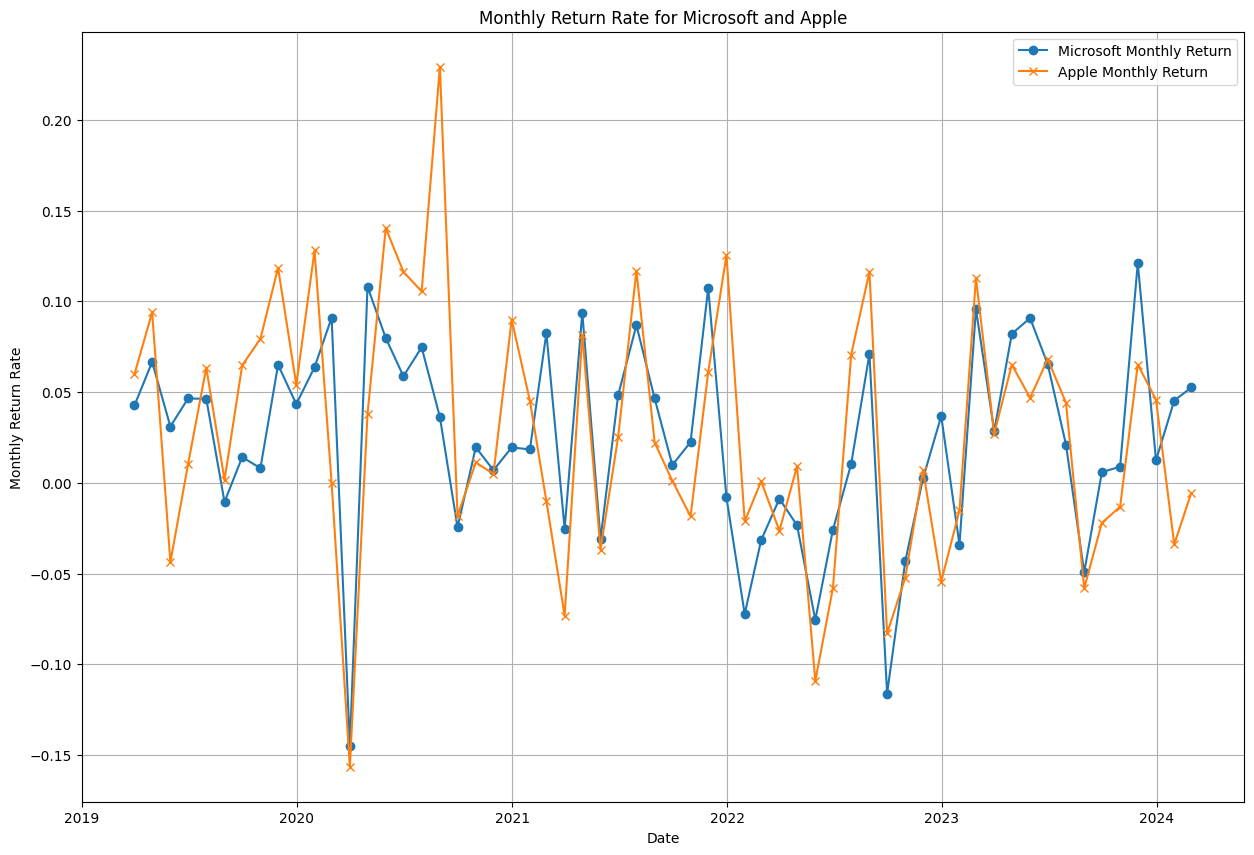

In [55]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE

#plot
plt.figure(figsize=(15, 10))
plt.plot(microsoft_monthly.index, microsoft_monthly['monthly_return'], label='Microsoft Monthly Return', marker='o')
plt.plot(apple_monthly.index, apple_monthly['monthly_return'], label='Apple Monthly Return', marker='x')
plt.title('Monthly Return Rate for Microsoft and Apple')
plt.xlabel('Date')
plt.ylabel('Monthly Return Rate')
plt.legend()
plt.grid(True)
plt.show()

**Enter answer here:**

Both companies demonstrate significant volatility in the monthly returns, whereas, in 1(a), they showed an upward trend. This shows the risks and instability that may exist within a shorter period of time, even if the overall trend may seem positive.

# Q3

## (a)

In [56]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE

#appling exp smoothing w/ different alpha values to the monthly downsampled Microsoft df
alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9]
smoothed_data_msft = {}

for alpha in alpha_list:
    smoothed_label = f'smoothed_{alpha}'
    smoothed_data_msft[smoothed_label] = microsoft_monthly['Adj Close'].ewm(alpha=alpha, adjust=False).mean()

#converting the dict to a df for plotting
smoothed_msft_df = pd.DataFrame(smoothed_data_msft, index=microsoft_monthly.index)


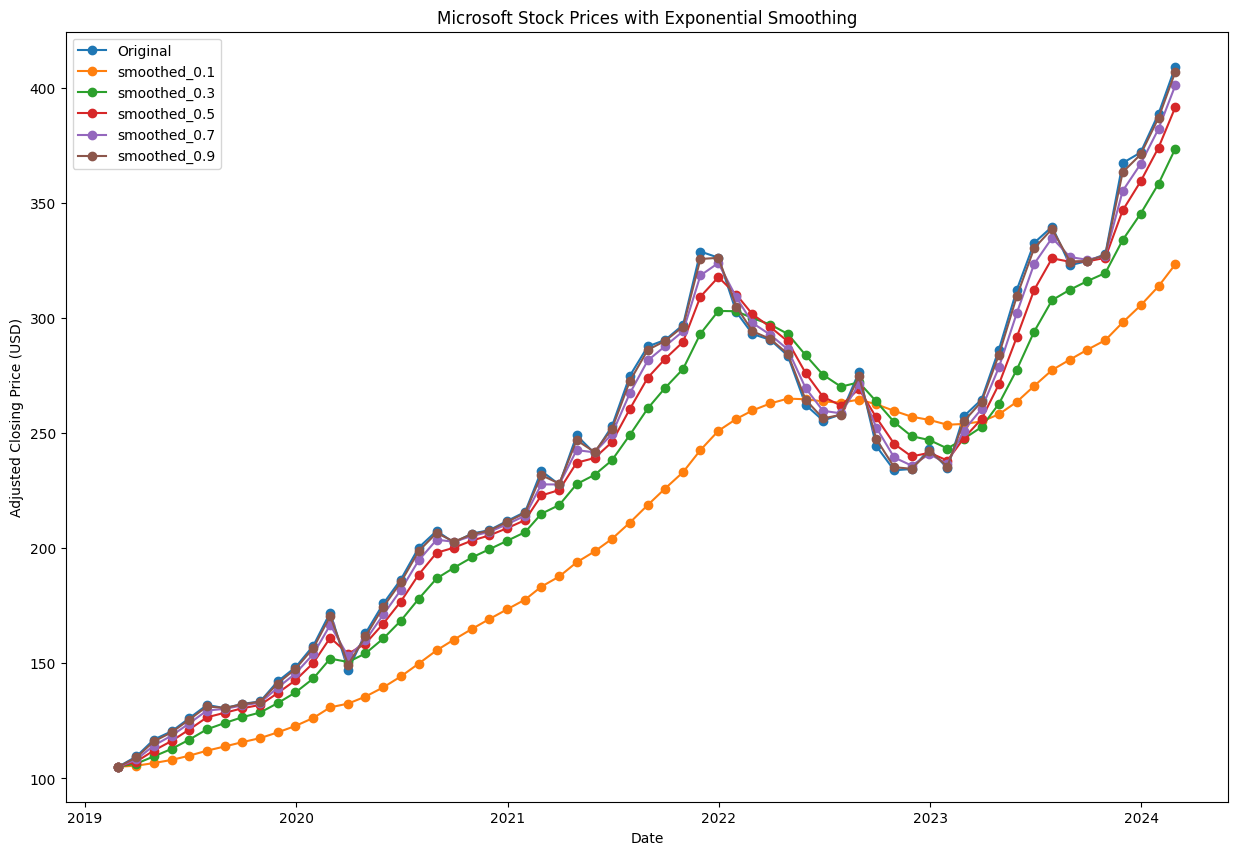

In [57]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (6 lines)

## YOUR CODE STARTS HERE

#plotting the onitial and smoothed data
plt.figure(figsize=(15, 10))
plt.plot(microsoft_monthly.index, microsoft_monthly['Adj Close'], label='Original', marker='o')

for alpha in alpha_list:
    smoothed_label = f'smoothed_{alpha}'
    plt.plot(smoothed_msft_df.index, smoothed_msft_df[smoothed_label], label=smoothed_label, marker='o')

plt.title('Microsoft Stock Prices with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.show()


In [58]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE

#applying exp smoothing w/ different alpha values to the monthly downsampled Apple df
smoothed_data_apple = {}

for alpha in alpha_list:
    smoothed_label = f'smoothed_{alpha}'
    smoothed_data_apple[smoothed_label] = apple_monthly['Adj Close'].ewm(alpha=alpha, adjust=False).mean()

#converting the dict to a df for plotting
smoothed_apple_df = pd.DataFrame(smoothed_data_apple, index=apple_monthly.index)



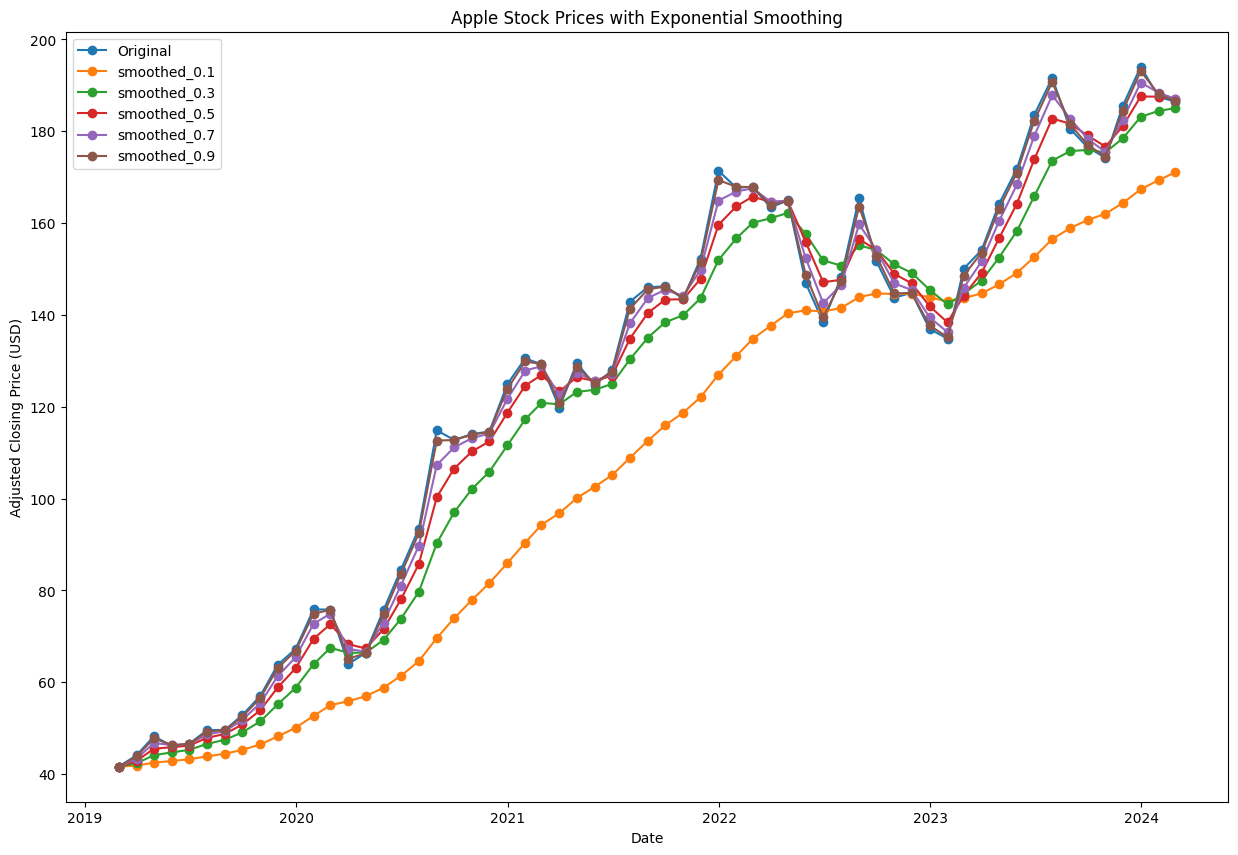

In [59]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (6 lines)

## YOUR CODE STARTS HERE

#plotting the initial and smoothed data
plt.figure(figsize=(15, 10))
plt.plot(apple_monthly.index, apple_monthly['Adj Close'], label='Original', marker='o')

for alpha in alpha_list:
    smoothed_label = f'smoothed_{alpha}'
    plt.plot(smoothed_apple_df.index, smoothed_apple_df[smoothed_label], label=smoothed_label, marker='o')

plt.title('Apple Stock Prices with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.show()

## (b)



**Enter your answer here:**

Decreasing param, alpha, assigns more weight to the older data, leading to a smoother line that is slow to react to recent changes. This is useful for indentifying long-term trends, but may not be adaptive to recent market trends.

# Q4

## (a)

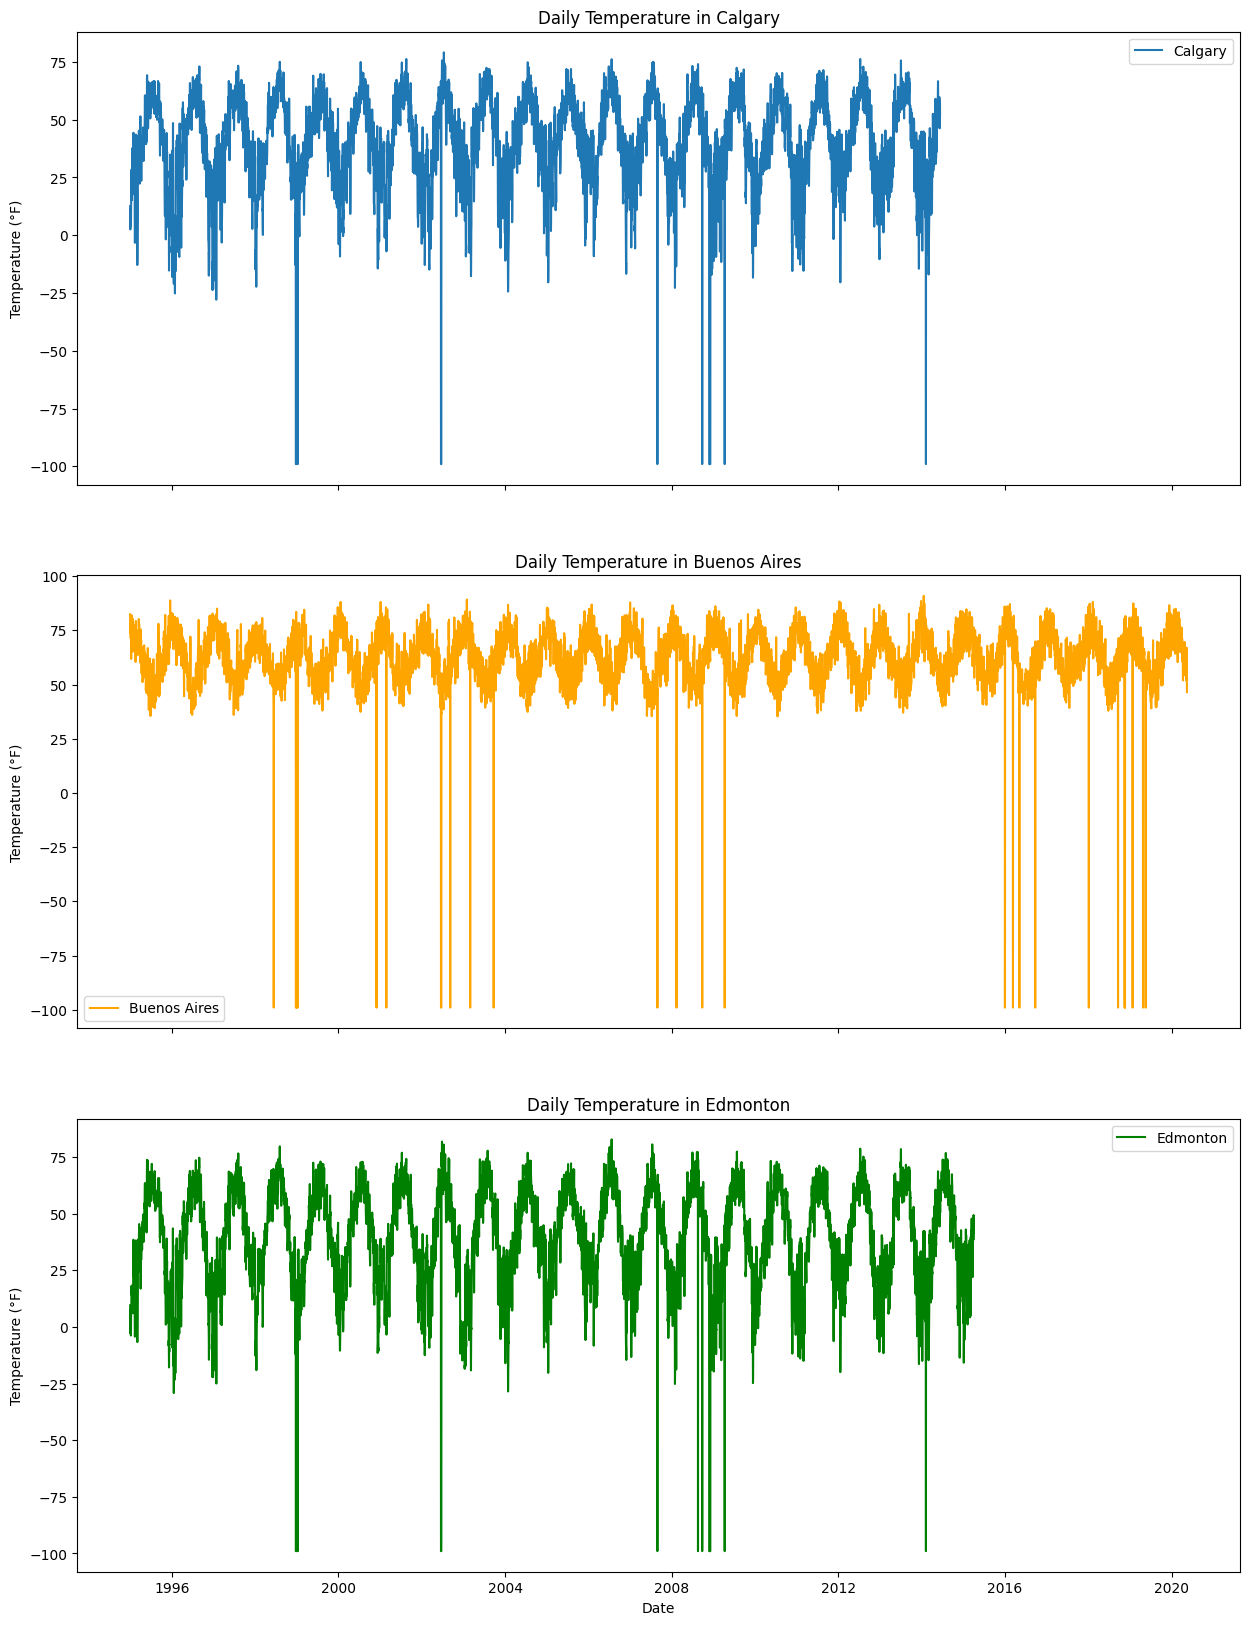

In [60]:
# Plot temperature data for each city in different subplots

## YOUR CODE STARTS HERE

fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

#Calgary
axs[0].plot(city_1_df.index, city_1_df['AvgTemperature'], label=city_1)
axs[0].set_title(f'Daily Temperature in {city_1}')
axs[0].set_ylabel('Temperature (°F)')
axs[0].legend()

#Buenos Aires
axs[1].plot(city_2_df.index, city_2_df['AvgTemperature'], label=city_2, color='orange')
axs[1].set_title(f'Daily Temperature in {city_2}')
axs[1].set_ylabel('Temperature (°F)')
axs[1].legend()

#Edmonton
axs[2].plot(city_3_df.index, city_3_df['AvgTemperature'], label=city_3, color='green')
axs[2].set_title(f'Daily Temperature in {city_3}')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Temperature (°F)')
axs[2].legend()

plt.show()

**Enter answer here:**

Firstly, there are anomalies that result in spikes in the graphs, most likely indicating presence of wrong data. Secondly, it shows that the temperature data has not been cleaned to remove the anomalies, leading to a distorted trend.

## (b)

In [61]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE

#finding and keeping the intersection of dates across all three cities
common_dates = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df_common = city_1_df.loc[common_dates]
city_2_df_common = city_2_df.loc[common_dates]
city_3_df_common = city_3_df.loc[common_dates]

In [62]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE

city_1_monthly = city_1_df_common['AvgTemperature'].resample('M').mean()
city_2_monthly = city_2_df_common['AvgTemperature'].resample('M').mean()
city_3_monthly = city_3_df_common['AvgTemperature'].resample('M').mean()

In [63]:
# Apply exponential smoothing to temperature data with alpha = 0.3

## YOUR CODE STARTS HERE

city_1_monthly_smoothed = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly_smoothed = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly_smoothed = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()


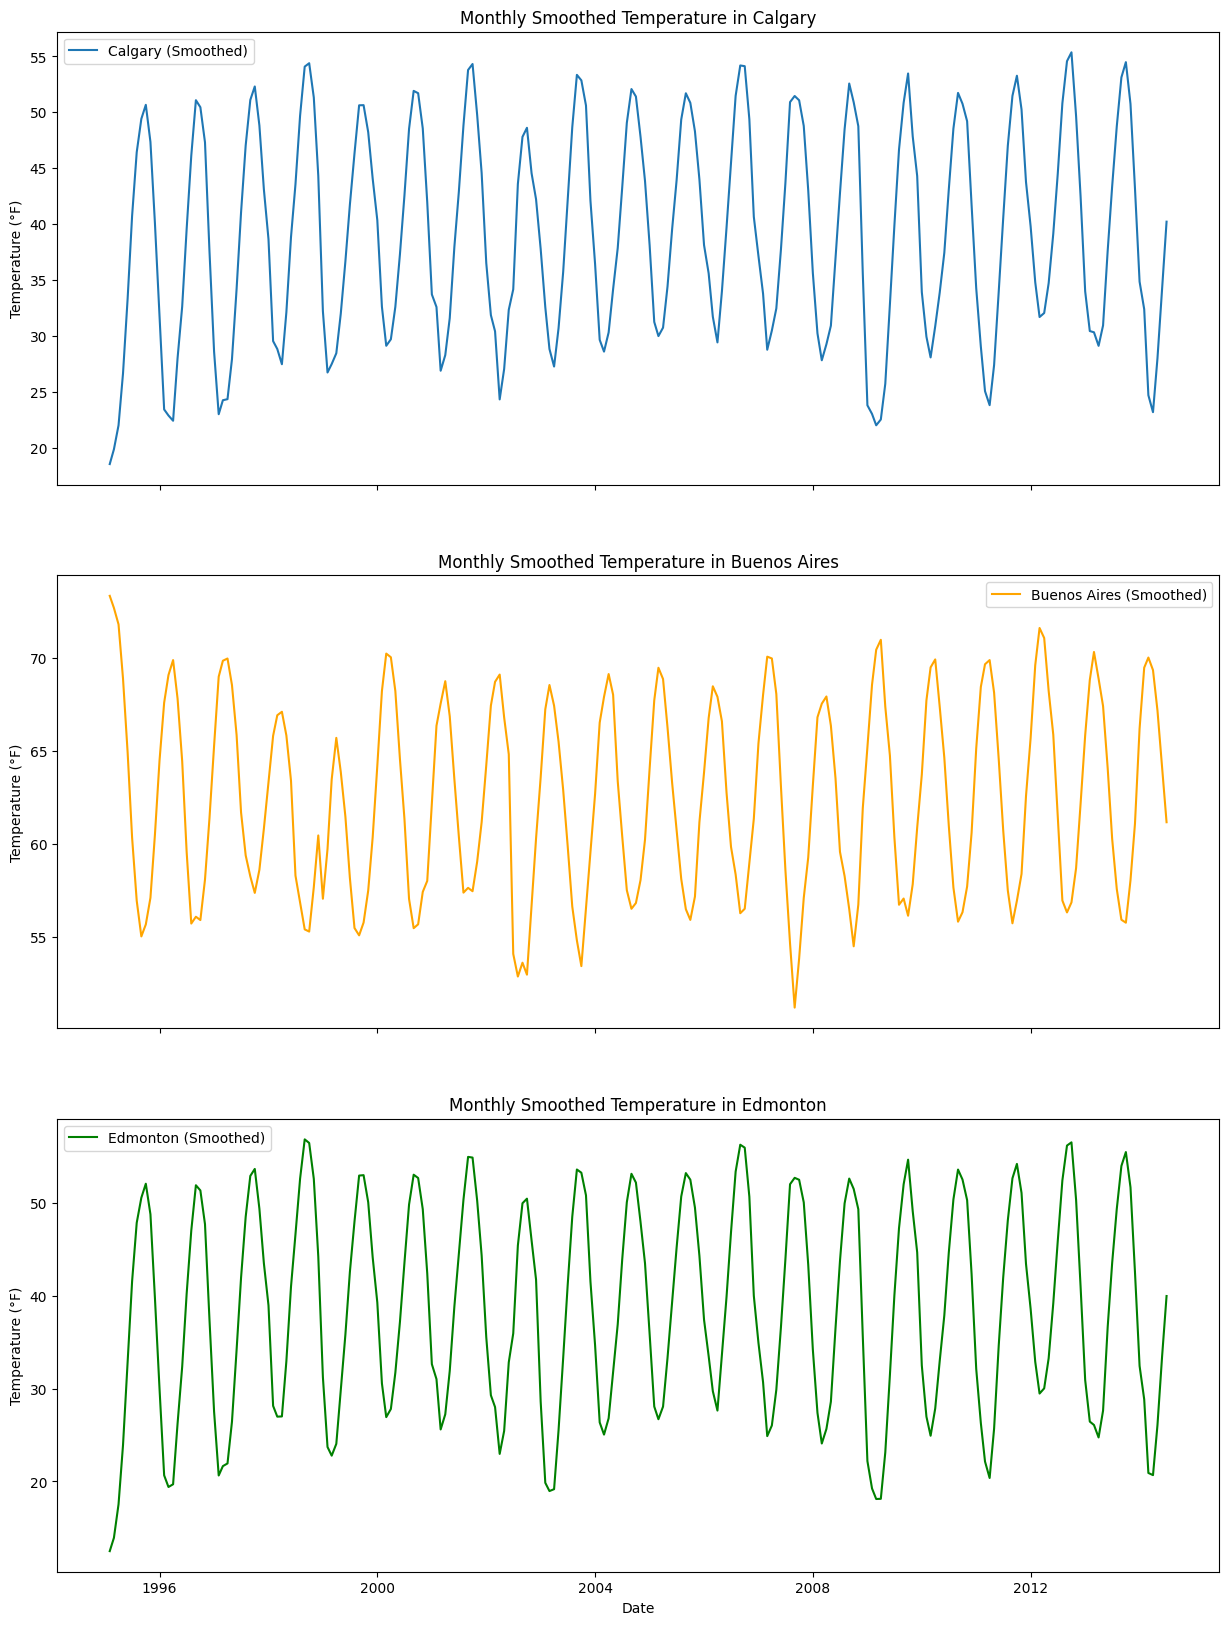

In [64]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE

fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

#smoothed Calgary
axs[0].plot(city_1_monthly_smoothed.index, city_1_monthly_smoothed, label=f'{city_1} (Smoothed)')
axs[0].set_title(f'Monthly Smoothed Temperature in {city_1}')
axs[0].set_ylabel('Temperature (°F)')
axs[0].legend()

#smoothed Buenos Aires
axs[1].plot(city_2_monthly_smoothed.index, city_2_monthly_smoothed, label=f'{city_2} (Smoothed)', color='orange')
axs[1].set_title(f'Monthly Smoothed Temperature in {city_2}')
axs[1].set_ylabel('Temperature (°F)')
axs[1].legend()

#smoothed Edmonton
axs[2].plot(city_3_monthly_smoothed.index, city_3_monthly_smoothed, label=f'{city_3} (Smoothed)', color='green')
axs[2].set_title(f'Monthly Smoothed Temperature in {city_3}')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Temperature (°F)')
axs[2].legend()

plt.show()

**Enter answer here:**

The plots show a clear seasonal trend, with temperatures peaking in summer months and falling in winter months. Calgary and Edmonton would be the closest to each other, as both show a similar weather trend, which can be seen in the plots.

## (c)

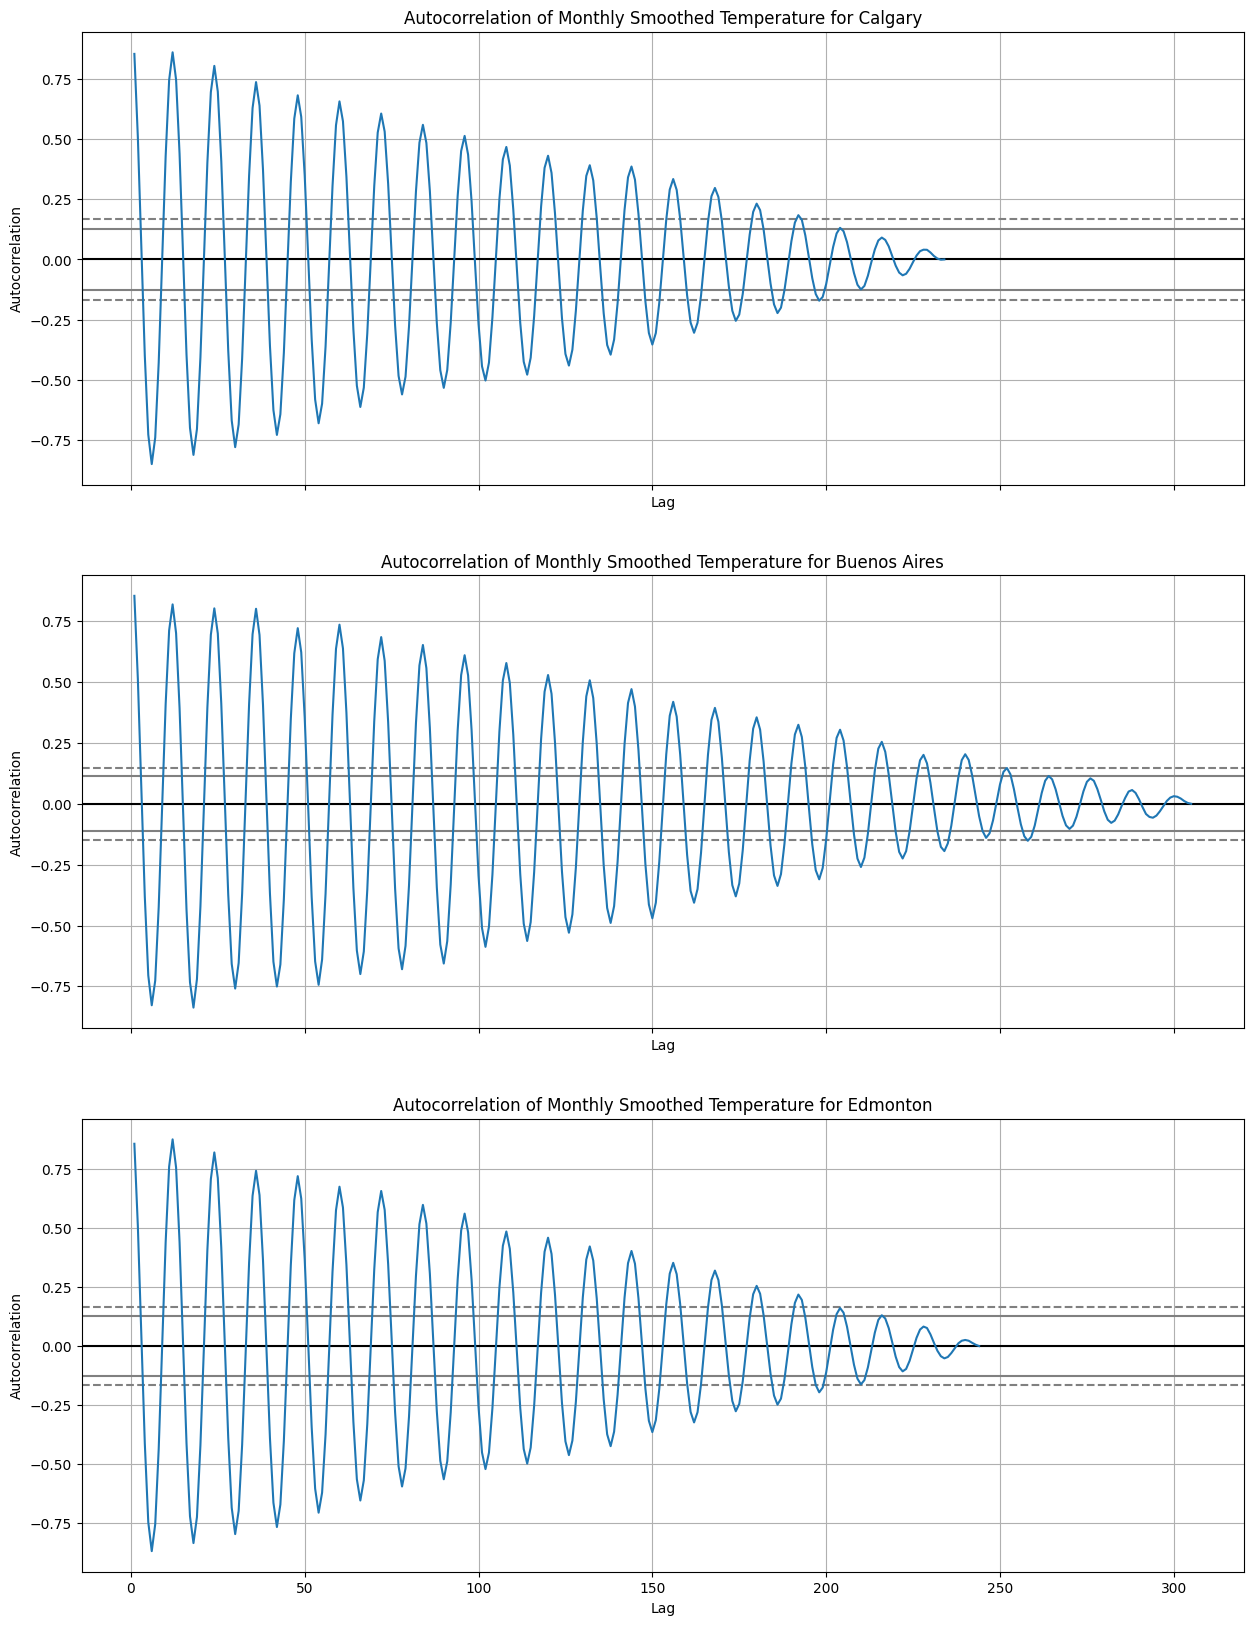

In [65]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE

#downsampling the data to monthly and applying exp smoothing with alpha = 0.3
city_1_monthly_smooth = city_1_df['AvgTemperature'].resample('M').mean().ewm(alpha=0.3, adjust=False).mean()
city_2_monthly_smooth = city_2_df['AvgTemperature'].resample('M').mean().ewm(alpha=0.3, adjust=False).mean()
city_3_monthly_smooth = city_3_df['AvgTemperature'].resample('M').mean().ewm(alpha=0.3, adjust=False).mean()

#plot autocorrelation
fig, axes = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

pd.plotting.autocorrelation_plot(city_1_monthly_smooth, ax=axes[0])
axes[0].set_title(f'Autocorrelation of Monthly Smoothed Temperature for {city_1}')

pd.plotting.autocorrelation_plot(city_2_monthly_smooth, ax=axes[1])
axes[1].set_title(f'Autocorrelation of Monthly Smoothed Temperature for {city_2}')

pd.plotting.autocorrelation_plot(city_3_monthly_smooth, ax=axes[2])
axes[2].set_title(f'Autocorrelation of Monthly Smoothed Temperature for {city_3}')

plt.show()


**Enter answer here:**

The plots show a strong seasonal cycle, indicated by the regular peaks and troughs, which confirms the observation in 4(b). As the lag increases, the autocorrelation for each city shows a cyclical trend, with a consistent frequency, which is a good indicator of a strong seasonal effect, taking place annually.

## (d)

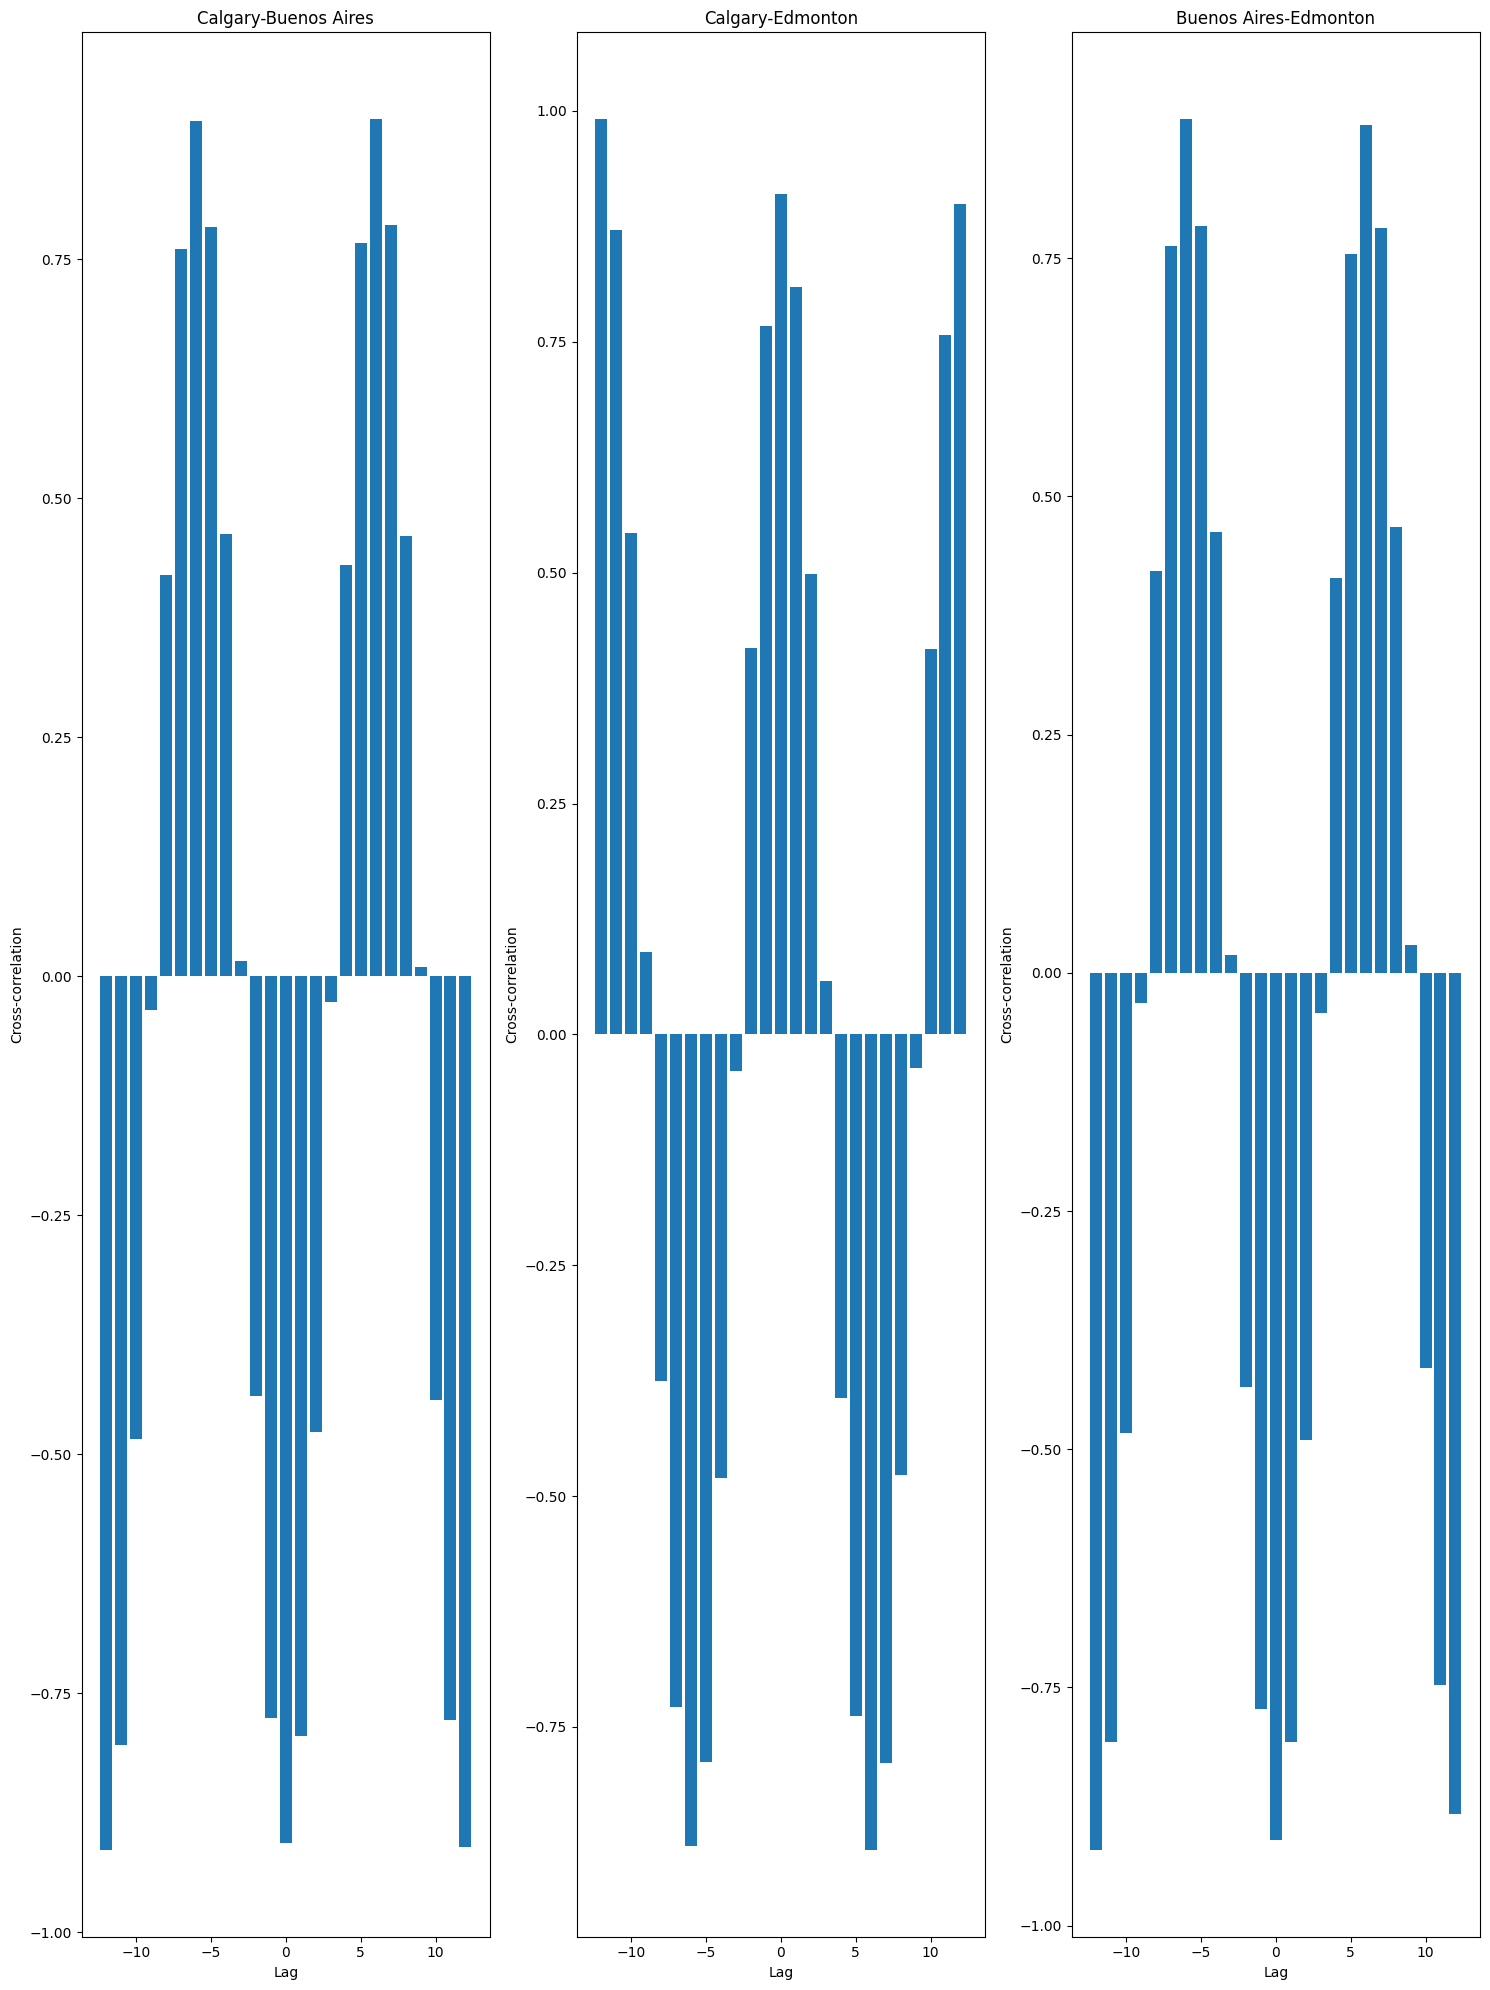

In [66]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE

#calculating the cross-correlation
lags = np.arange(-12, 13, 1)
cross_corr_calgary_buenosaires = ccf(city_1_monthly_smoothed, city_2_monthly_smoothed)[:25]
cross_corr_calgary_edmonton = ccf(city_1_monthly_smoothed, city_3_monthly_smoothed)[:25]
cross_corr_buenosaires_edmonton = ccf(city_2_monthly_smoothed, city_3_monthly_smoothed)[:25]

#plotting cross-correlation
plt.figure(figsize=(15, 20))

plt.subplot(131)
plt.bar(lags, cross_corr_calgary_buenosaires)
plt.title('Calgary-Buenos Aires')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')

plt.subplot(132)
plt.bar(lags, cross_corr_calgary_edmonton)
plt.title('Calgary-Edmonton')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')

plt.subplot(133)
plt.bar(lags, cross_corr_buenosaires_edmonton)
plt.title('Buenos Aires-Edmonton')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')

plt.tight_layout()
plt.show()

**Enter answer here:**

When it is summer in Edmonton and Calgary, it is winter in Buenos Aires.